In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from itertools import combinations
def loss_prauc(clusters, nodes_predictions, true_labels, lam, precision=0.8):
    predictions, _ = nodes_predictions
    loss = 0.
    N = len(clusters.keys())
    for label_1, label_2 in combinations(clusters.keys(), 2):
        # center between two clusters
        center = ((clusters[label_1]['mean'] + clusters[label_2]['mean']) / 2.).detach()
        
        if clusters[label_1]['mean'] < center:
            negative_label = label_1
            positive_label = label_2
        else:
            negative_label = label_2
            positive_label = label_1
        positive_predictions = predictions[true_labels==positive_label]
        negative_predictions = predictions[true_labels==negative_label]
        L_plus = torch.relu(1 + center - positive_predictions).sum()
        L_minus = torch.relu(1 - center + negative_predictions).sum()
        loss += (1 + lam) * L_plus + L_minus * lam * precision / (1 - precision) - lam * float(len(positive_predictions))
    return loss / (N * (N - 1))

In [30]:
neg = np.random.randn(1000) + 2
pos = np.random.randn(1000) + 6

In [31]:
center = (np.median(neg) + np.median(pos)) / 2

In [32]:
np.maximum(1 - center + neg, 0).sum() / len(neg)

0.09341584614141268

In [33]:
np.maximum(1 + center - pos, 0).sum() / len(pos)

0.07643692912264186

In [8]:
import matplotlib.pyplot as plt

In [62]:
x = np.random.uniform(-1, 1, size=(10000, 2))

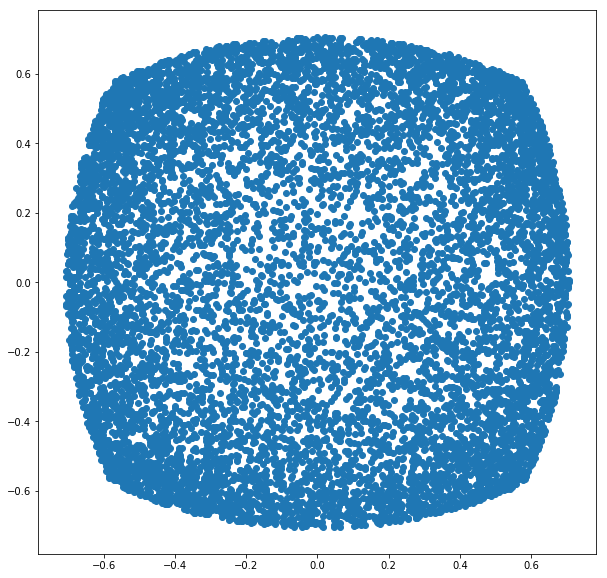

In [63]:
plt.figure(figsize=(10, 10))
y = x / np.sqrt((x**2).sum(axis=1, keepdims=True) + 1)
plt.scatter(y[:, 0], y[:, 1])

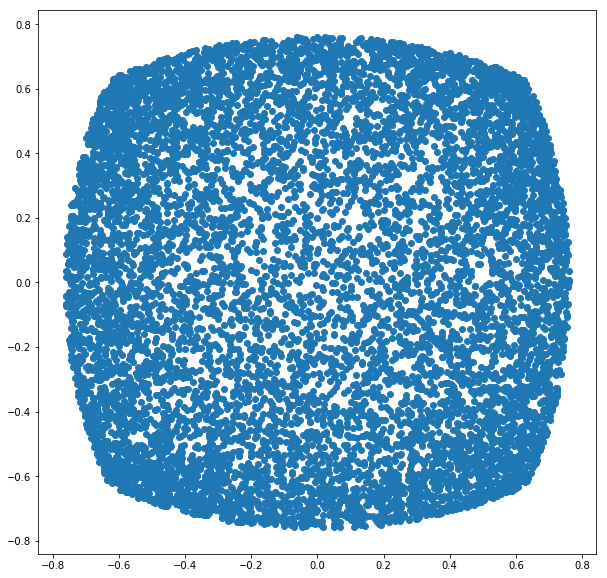

In [64]:
plt.figure(figsize=(10, 10))
y = x * np.tanh(np.sqrt((x**2).sum(axis=1, keepdims=True))) / np.sqrt((x**2).sum(axis=1, keepdims=True))
plt.scatter(y[:, 0], y[:, 1])